In [3]:
import os
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
dataset_path = "/path/to/dataset"
class_folders = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]
class_counts = {}

for folder in class_folders:
    folder_path = os.path.join(dataset_path, folder)
    num_images = len(os.listdir(folder_path))
    class_counts[folder] = num_images


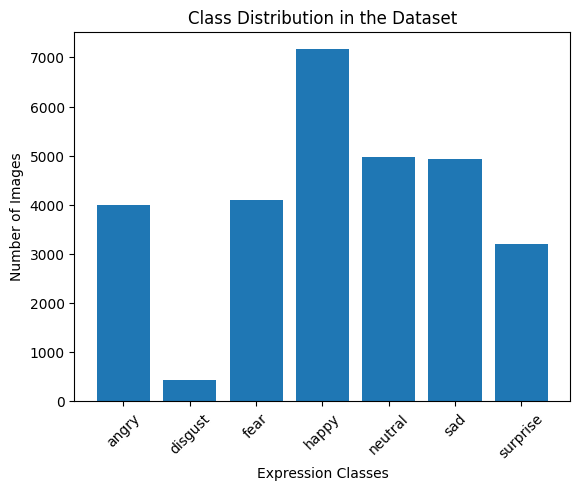

In [ ]:
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel("Expression Classes")
plt.ylabel("Number of Images")
plt.title("Class Distribution in the Dataset")
plt.xticks(rotation=45)
plt.show()


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define paths
dataset_path = "/path/to/dataset"
train_path = "/desired/train/path"
val_path = "/desired/val/path"
test_path = "/desired/test/path"

# List of class folders
class_folders = os.listdir(dataset_path)

# Create train, validation, and test directories
os.makedirs(train_path, exist_ok=True)
os.makedirs(val_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

# Splitting dataset into train, validation, and test sets
for folder in class_folders:
    class_folder_path = os.path.join(dataset_path, folder)
    images = os.listdir(class_folder_path)
    train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)
    train_images, val_images = train_test_split(train_images, test_size=0.25, random_state=42)  # 20% validation from train

    # Move images to respective directories
    for image in train_images:
        src = os.path.join(class_folder_path, image)
        dst = os.path.join(train_path, folder, image)
        os.makedirs(os.path.dirname(dst), exist_ok=True)
        shutil.copy(src, dst)

    for image in val_images:
        src = os.path.join(class_folder_path, image)
        dst = os.path.join(val_path, folder, image)
        os.makedirs(os.path.dirname(dst), exist_ok=True)
        shutil.copy(src, dst)

    for image in test_images:
        src = os.path.join(class_folder_path, image)
        dst = os.path.join(test_path, folder, image)
        os.makedirs(os.path.dirname(dst), exist_ok=True)
        shutil.copy(src, dst)


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, Dropout, MaxPooling2D, Dense, Flatten
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))


Found GPU at: /device:GPU:0


In [74]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)))
model.add(MaxPooling2D((2, 2)))

# Second Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Third Convolutional Layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Fourth Convolutional Layer
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten Layer
model.add(Flatten())

# Dense Layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Regularization with dropout
model.add(Dense(7, activation='softmax'))  # 7 classes for different expressions




In [75]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the summary of the model
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 46, 46, 32)        896       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 10, 10, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 4, 4, 128)      

In [76]:
# Loading data and Image Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
train_generator = train_datagen.flow_from_directory('/train/path',
                                                    batch_size=32,
                                                    target_size=(48, 48))
#train_generator = train_generator.prefetch(buffer_size=tf.data.AUTOTUNE)
validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory('/validation/path',
                                                         batch_size=32,
                                                         target_size=(48, 48))
#validation_generator = validation_generator.prefetch(buffer_size=tf.data.AUTOTUNE)


Found 17327 images belonging to 7 classes.
Found 5766 images belonging to 7 classes.


In [78]:
history = model.fit(train_generator,
                    epochs=100,
                    validation_data=validation_generator
                    )

Epoch 1/100
542/542 [==============================] - 28s 51ms/step - loss: 1.8163 - accuracy: 0.2474 - val_loss: 1.7951 - val_accuracy: 0.2532
Epoch 2/100
542/542 [==============================] - 29s 53ms/step - loss: 1.8022 - accuracy: 0.2483 - val_loss: 1.7836 - val_accuracy: 0.2582
Epoch 3/100
542/542 [==============================] - 27s 50ms/step - loss: 1.7712 - accuracy: 0.2650 - val_loss: 1.7097 - val_accuracy: 0.2990
Epoch 4/100
542/542 [==============================] - 28s 51ms/step - loss: 1.7465 - accuracy: 0.2795 - val_loss: 1.6758 - val_accuracy: 0.3153
Epoch 5/100
542/542 [==============================] - 27s 50ms/step - loss: 1.7142 - accuracy: 0.2995 - val_loss: 1.6234 - val_accuracy: 0.3508
Epoch 6/100
542/542 [==============================] - 27s 49ms/step - loss: 1.6732 - accuracy: 0.3232 - val_loss: 1.5436 - val_accuracy: 0.3965
Epoch 7/100
542/542 [==============================] - 27s 49ms/step - loss: 1.6136 - accuracy: 0.3589 - val_loss: 1.4812 - val_ac

In [79]:
model.save('/path/FER.h5')

In [80]:
#Confusion matrix
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
model = load_model('/path/FER.h5')
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        '/test/path',
        target_size=(48, 48),
        batch_size=32,
        class_mode='categorical',
        shuffle=False)
y_pred = model.predict_generator(test_generator, steps=len(test_generator), verbose=1)
y_true = test_generator.classes
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_true, y_pred_classes)


Found 5813 images belonging to 7 classes.
  6/182 [..............................] - ETA: 2s 

<ipython-input-80-0e9ab421a89d>:13: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(test_generator, steps=len(test_generator), verbose=1)


182/182 [==============================] - 2s 11ms/step


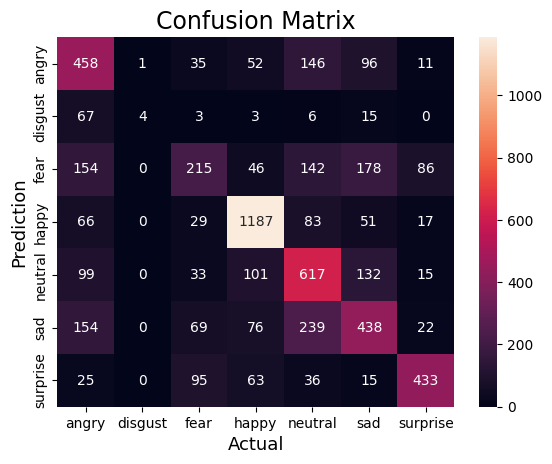

Accuracy   : 0.576638568725271


In [81]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score
cm_df = pd.DataFrame(cm, index=test_generator.class_indices.keys(), columns=test_generator.class_indices.keys())
#print(cm_df)
sns.heatmap(cm_df,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()
accuracy = accuracy_score(y_true, y_pred_classes)
print("Accuracy   :", accuracy)


Text(0.5, 1.0, 'Accuracy Curve')

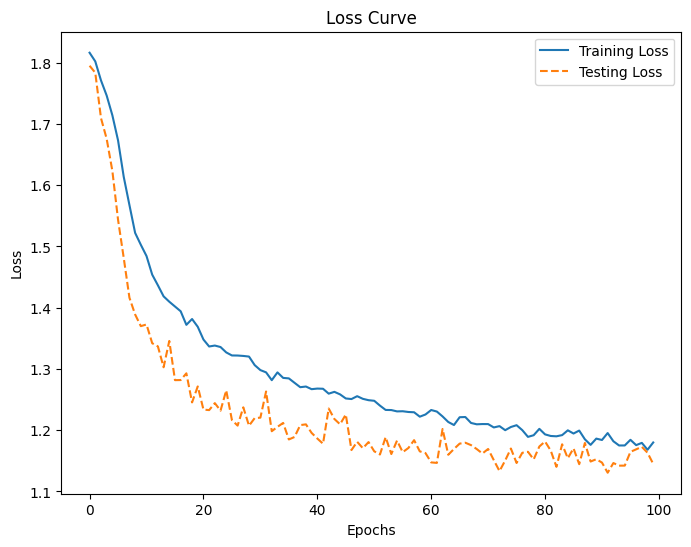

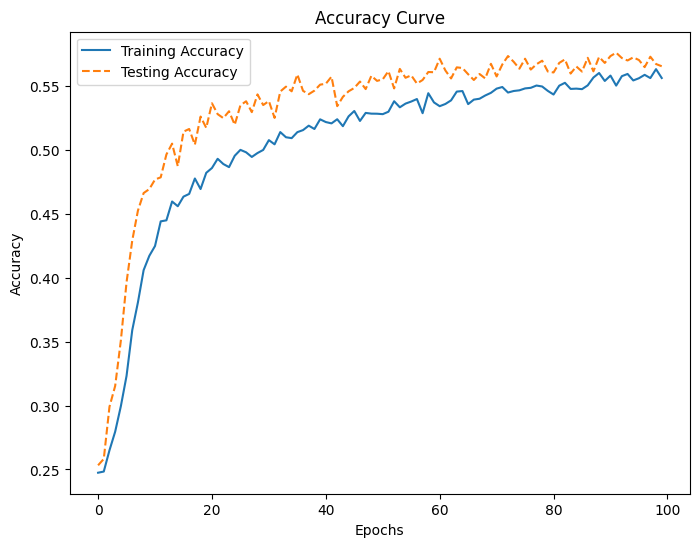

In [82]:
# Loss Curves
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],ls='--')
plt.legend(['Training Loss','Testing Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Loss Curve")

# Accuracy Curves
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'],ls='--')
plt.legend(['Training Accuracy','Testing Accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy Curve")